# 1. Getting Started

## 1.1 Expressions

In [ ]:
2+2                    # a numerical expression

In [ ]:
"A" + ":" + "B"        # a string expression

In [ ]:
[2, 4, 6] + [3, 5, 7]  # a list expression

In [ ]:
(2 + 3.1)*(5  - 1.012) # expressions with parentheses

In [ ]:
2**1000                # large integers

## 1.2 Variables

In [ ]:
a = 3.1; b = 4.6; a*b   # store data in variables, use variables in expressions

In [ ]:
a                       # retrieve the stored data

In [ ]:
a = 10; a*b             # the value of a variable can be changed

In [ ]:
aa = [2, 4, 6]; bb = [3, 5, 7]; cc = aa + bb

In [ ]:
cc

## 1.3 Functions,  Conditionals

In [ ]:
len(cc)                     # len is function from lists of things to integers

In [ ]:
len("Howdy!")               # len is also a function from strings to integers.  Hmmm...

In [ ]:
import math; math.sqrt(2)  # You have to import the module in which `sqrt` is 
# defined before using it.

In [ ]:
def square(x):             # Defined a function yourself
    return x*x             # Note 'return' -- it is mandatory

In [ ]:
math.sqrt(square(2))        # The first test

In [ ]:
square(3)


In [ ]:
a = square(math.sqrt(2));   a     # Another test.

In [ ]:
str(123)                    # Convert a number to a string

In [ ]:
def digits(n):              # Define a function by composing existing functions
    return len(str(n))

digits(2**1000)

In [ ]:
def collatz(n):            # This function uses a conditional statement to make a decision.
    if n % 2 == 0:
        return n//2
    else:
        return 3*n + 1

In [ ]:
collatz(1)

In [ ]:
collatz(_)  #  _ is special variable that holds the last value computed

In [ ]:
collatz(_)

In [ ]:
collatz(_) # We have found a cycle of repeating values

In [ ]:
# Defining a pulse:

def pulse(x):
    if x < 0:
        return 0
    elif x < 1:
        return 1
    else:
        return 0

In [ ]:
# Testing the pulse function

list(map(pulse, [-2,-1,0,1,2]))

In [ ]:
# Graphing the pulse

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

xs = np.linspace(-3,3,100)

ys = list(map(pulse, xs))

plt.plot(xs, ys)

## 1.4 Lambda functions & functional parameters

In [ ]:
# Lambda functions. These are functions without a name.
# For more fun: read about the Lambda Calculus
# We will use them to make a table of squares

list(map(lambda x: x*x, range(0,8)))

# lambda x: x*x is the function that squares its argument:

(lambda x: x*x)(3)

# Lets unpack this:
#  range(0,8) is a generator for the list
#  of numbers [0, 1, 2, 3, 4, 5, 6, 7]
#  To retrieve the list, evaluate list(range(0,8))



In [ ]:
# Let's apply our lambda function to a list of numbers
# to make a list of squares:

list(map(lambda x: x*x, [1,2,3,4,5]))

# map applies a function to a list
# You have to use list(...) to get the result (bummer)

In [ ]:
# A shortcut for making lists:

list(range(1,10))

In [ ]:
# Let's use the shortcut for our table of squares:

list(map(lambda x: x*x, range(1,10)))

### Integration

Python functions can use other functions as parameters.
We use this feature as well as lambda functions to
compute some integrals. Computation of the integrals below
uses the "while loop" to do repeated woork. We talk more 
about loops in the following two sections.

In [ ]:
# Here we see that functions can take functions as a parameter.
# We'll use this feature to define an approximate definite integral
# using the rectangle rule. You can do much better with the trapeoid
# rule or Simpson's rule.


def integral(f, a, b, h):
    sum = 0
    x = a
    while x < b:
        sum = sum + f(x)*h
        x = x + h
    return sum

# Let's test our integral function:

integral(lambda x: 1, 0, 1, 0.1), integral(lambda x: x, 0, 1, 0.01), integral(lambda x: x*x, 0, 1, 0.01)

In [ ]:
# Let's graph the integral of the pulse function:

integrated_pulse = lambda x: integral(pulse, -1, x, 0.01)

list(map(integrated_pulse, range(-3,4)))

ys = list(map(integrated_pulse, xs))
plt.plot(xs, ys)

In [ ]:
# We can define a function that takes
# a function as one of its parameters 
# and returns a function as a value.

def indefinite_integral(f,a,h):
    return lambda x: integral(f, a, x, h)

# Let's test this "functional" by using it
# to integrate the pule function:

ff = indefinite_integral(pulse, -3, 0.01)

list(map(ff, range(-3, 4)))

In [ ]:
# CONVOLUTION OF FUNCTIONS f*g(x)

def convolution(f, g, a, b, h):
    return lambda x: integral(lambda u: f(u)*f(x-u), a, b, h)

ff = convolution(pulse, pulse, -4, 4, 0.01)

xs = np.linspace(-3,5,100)
ys = list(map(ff, xs))
plt.plot(xs, ys)    

# 1.5 Basics Loops

Loops are an efficient way of commandng the computer to do repeated work.


In [ ]:
# Print a table of function values
# by looping over range(0,20)

k = 17;
for i in range(0,20):
  print(i, k)
  k = collatz(k)


In [ ]:
# Compute the sum 1 + 2 + ... + 10
# ACCUMULATE the result in th varaible `sum`

sum = 0
for i in range(1,11):
    sum = sum + i
sum

In [ ]:
# Invest money at 3% interest for 10 years:

sum = 100
for i in range(0,11):
    print (i, sum)
    sum = 1.03*sum

In [ ]:
# Let's not get crazy with precision:

sum = 100
for i in range(0,11):
    print(i, sum)
    sum = round(1.03*sum,2)

In [ ]:
# We can do better with the formatting:

sum = 100
for i in range(0,11):
    print("%4d:  %4.2f" %(i, sum))
    sum = round(1.03*sum,2)

In [ ]:
# Sum of the first n terms of the harmonic series
# 1 + 1/2 + 1/3 + ... + 1/n

sum = 0
for n in range(1,100):
    sum = sum + 1.0/n
sum

## 1.5 The While Loop

In [ ]:
# How many terms are needed in the harmonic series to get sum >= 10.
# In the loops used above the number of times the loop body is
# called is known in advance.  Not so for the loop below.

n = 1
sum = 0
while sum < 10:
    sum = sum + 1.0/n
    n = n + 1
n

In [ ]:
# How long it takes to pay off a loan?

import math

balance = 5000.00
annual_rate = 0.09
monthly_rate = math.exp(math.log(1 + annual_rate)/12.0) - 1
monthly_factor = 1 + monthly_rate
monthly_payment = 150
month = 0

print("Monthly rate: %1.4f\n" %(monthly_rate))

# Use d to format integers.  For example %4d means 
# format an integer in a 4-character space.  Use f
# to format floating point numbers.  For example,
# %4.2f means format a floating point number with
# 4 characters to the left of the decimal point
# and 2 to the right.

while balance > 0:
    print ("%4d: %4.2f" %(month, balance))
    balance = monthly_factor*balance - monthly_payment
    month = month + 1
    
print("\n%d months to pay off your loan" %(month))

## 1.6 Randomness: simulating coin tosses


In [ ]:
# Let's simulate the toss of a coin

import random as r

def coin():
    u = r.random()
    if u < 0.5:
        return "H"
    else:
        return "T"

coin()


In [ ]:

import random as r

r.random()

In [ ]:
# Toss our virtual coin 10 times:

for i in range(0, 10):
    print (coin(), end = "")

In [ ]:
# Instead of printing out random H and T's, we 
# will construct a random string of H and T's.

def run(n):
  output = ""
  for k in range(0,n):
    output = output + coin()
  return output

run(20)

In [ ]:
# Let's do a little statistics. We first devise 
# a function to count the number of occurrences
# of 'H' in a string:

def count_heads(str):
  heads = 0
  for letter in list(str):
      if letter == 'H':
          heads = heads + 1
  return heads

# Then we can do this:
count_heads(run(100))

In [ ]:
# Let's run this experiment a bunch of times.
# Notice that the last argument of the function
# 'run_experiment' is itself a function

def run_experiment(trials, n, f):
    results = []
    for i in range(0, trials):
        results = results + [f(n)]
    return results


def experiment(n):
    return count_heads(run(n))

run_experiment(10, 100, experiment)

In [ ]:
# We can also do statistics on the statistics, so to speak.
# Lets' compute the mean, variance, and standard deviation
# of the data produced by 'run_experiment(10, 100, experiment)'

# First, some data:

del sum  # We said 'sum = 0', etc., above, so now Python is confused

data = run_experiment(10, 100, experiment);
print(data)

# Second, a function to compute the mean of a list of numbers.

def mean(x):
    return (sum(x)/len(x))
    
mean(data)

In [ ]:
data

In [ ]:
mean(data)

In [ ]:
# Next, the variance. For this we will use some
# ideas from functional programming

foo = [1,2,3,4,5]

print(mean(foo))

list(map(lambda x: x - 3, foo))
# list(map(lambda x: x - 3, foo))
# 'lambda x: x - 3 is a function
# 'map(f, list)' applies f to each element of 'list' to produce a new list.

# map(f, [a,b,c]) == [f(a), f(b), f(c)]

In [ ]:
# Ok, we have the tools needed to generate a list of 
# differences given a list and a "central value":

def delta(data, center):
    return list(map(lambda x: x - center, data))
   
delta(foo, 4)

In [ ]:
# Here is a functtion to compute deviations from the mean:

def deviation(data):
    return delta(data, mean(data))

deviation(foo)

In [ ]:
# To compute the variance, we square the deviations, add, 
# and divide by the number of data points

def variance(data):
    squares = map(lambda x: x*x, deviation(data))
    return sum(squares)/len(data)

variance(foo)

# remark on N versus N - 1

In [ ]:
# Finally, the standard deviation is the square root of the variance:
import math;

def stdev(data):
    return math.sqrt(variance(data))
    
stdev(foo)

In [ ]:
# Let's return to the statistica of our experiments:
data = run_experiment(10, 100, experiment)
print ("data", data)
print ("mean", mean(data))
print ("variance", variance(data))
print ("stdev", stdev(data))

In [ ]:
# Let's package the previous computations for future use

def statistics(data):
    print ("data", data)
    print ("mean", mean(data))
    print ("variance", variance(data))
    print ("stdev", stdev(data))

In [ ]:
# The data above was 'data = run_experiment(10, 100, experiment)'
# Let's re-run the experiment like this, varying one parameter:

data = run_experiment(10, 1000, experiment);

statistics(data)

In [ ]:
# And again:

data = run_experiment(10, 10000, experiment);

statistics(data)

## 1.7 More Graphs

We will make more serious use of the `numpy` library
in this section.

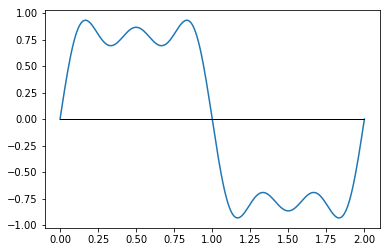

In [8]:
# We will graph a Fourier

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

t = np.arange(0.0, 2.01, 0.01)  # an array of numbers, 0, 0.01, 0.02, ..., 2.00
df = 1.0
s = np.sin(3.1416*t) + (df*1.0/3.0)*np.sin(3*np.pi*t) + (df*1.0/5.0)*np.sin(5*np.pi*t)

# Each term of the above, e.g., np.sin(3.14168*t) is an arrary of numbers:
# A numpy function f applied to array([a,b,c, ...]) is array([f(a), f(b), f(c), ...])
# One can add numpy arrrays and multiply them by scalars (as one sees above).
# If a = array([x1, x1, ... ]) and b = array([y1, y2, ... ]) are two numpty 
# arrays the then plt.plot(a, b) will plot the segements joining successive 
# pairs of points (x1, y1), (x2, y2), etc.

abscissa = np.zeros(len(t))

plt.plot(t, s)
plt.plot(t, abscissa, color='black', linewidth=1.0 )

plt.savefig("fourier.png")
plt.show()

In [4]:
print(t)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 